In [8]:
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, GlobalMaxPooling1D
import matplotlib.pyplot as plt

In [9]:
# Load the IMDB dataset
num_words = 10000
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=num_words)


In [10]:
# Pad sequences to ensure uniform length for input to the neural network
maxlen = 100
X_train = pad_sequences(X_train, maxlen=maxlen)
X_test = pad_sequences(X_test, maxlen=maxlen)


In [11]:
# Build the neural network model
model = Sequential([
    Embedding(input_dim=num_words, output_dim=32, input_length=maxlen),
    GlobalMaxPooling1D(),  # Pooling layer to extract most important features
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')
])


In [12]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [13]:
# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)


Epoch 1/10


625/625 [==============================] - 9s 10ms/step - loss: 0.5080 - accuracy: 0.7436 - val_loss: 0.3888 - val_accuracy: 0.8224
Epoch 2/10
625/625 [==============================] - 6s 9ms/step - loss: 0.3102 - accuracy: 0.8668 - val_loss: 0.3732 - val_accuracy: 0.8368
Epoch 3/10
625/625 [==============================] - 6s 10ms/step - loss: 0.2246 - accuracy: 0.9101 - val_loss: 0.4088 - val_accuracy: 0.8284
Epoch 4/10
625/625 [==============================] - 6s 10ms/step - loss: 0.1521 - accuracy: 0.9439 - val_loss: 0.4822 - val_accuracy: 0.8206
Epoch 5/10
625/625 [==============================] - 5s 8ms/step - loss: 0.0945 - accuracy: 0.9684 - val_loss: 0.5598 - val_accuracy: 0.8164
Epoch 6/10
625/625 [==============================] - 7s 11ms/step - loss: 0.0511 - accuracy: 0.9861 - val_loss: 0.6564 - val_accuracy: 0.8144
Epoch 7/10
625/625 [==============================] - 7s 11ms/step - loss: 0.0245 - accuracy: 0.9951 - val_loss: 0.7897 - val_accuracy: 0.8100

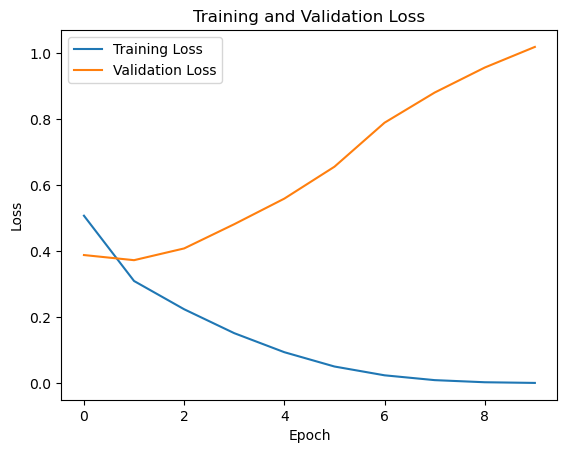

In [14]:
# Plot training and validation losses
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

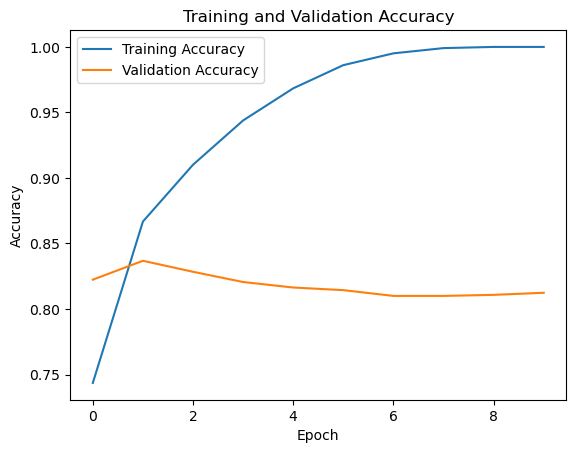

In [15]:

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()


In [16]:

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}, Test Accuracy: {accuracy}')


782/782 [==============================] - 3s 4ms/step - loss: 1.0215 - accuracy: 0.8016
Test Loss: 1.0214534997940063, Test Accuracy: 0.8015999794006348


In [17]:

# Predictions and printing sentiment for the first 10 samples
predictions = model.predict(X_test)
sentiment_labels = ['Negative' if pred < 0.5 else 'Positive' for pred in predictions]


782/782 [==============================] - 3s 3ms/step


In [20]:
for i in range(100):
    print(f'Actual: {"Positive" if y_test[i] == 1 else "Negative"}, Predicted: {sentiment_labels[i]}')



Actual: Negative, Predicted: Negative
Actual: Positive, Predicted: Positive
Actual: Positive, Predicted: Positive
Actual: Negative, Predicted: Positive
Actual: Positive, Predicted: Positive
Actual: Positive, Predicted: Positive
Actual: Positive, Predicted: Positive
Actual: Negative, Predicted: Negative
Actual: Negative, Predicted: Positive
Actual: Positive, Predicted: Positive
Actual: Positive, Predicted: Negative
Actual: Negative, Predicted: Negative
Actual: Negative, Predicted: Negative
Actual: Negative, Predicted: Negative
Actual: Positive, Predicted: Positive
Actual: Negative, Predicted: Negative
Actual: Positive, Predicted: Positive
Actual: Negative, Predicted: Negative
Actual: Negative, Predicted: Negative
Actual: Negative, Predicted: Negative
Actual: Positive, Predicted: Positive
Actual: Positive, Predicted: Positive
Actual: Positive, Predicted: Negative
Actual: Positive, Predicted: Positive
Actual: Positive, Predicted: Positive
Actual: Positive, Predicted: Positive
Actual: Nega